In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import requests



In [34]:
with open('D:\sem 3\Web tech\spurs_2025.html', 'r', encoding='utf-8') as f:#i could not webscrape using bs4 I would have to use selenium to get past its bot detector
    #but a more manual way is to download pagesource and then locally parse it this means u dont do https request and handle it like any other text file
    html = f.read()#then use soup to parse it I used lxml because its faster. Parsing basically gets rid of all html tags and stuff
soup=BeautifulSoup(html,"lxml")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sharat\AppData\Local\Temp\ipykernel_2780\2856190293.py:1: SyntaxWarning: invalid escape sequence '\s'
  with open('D:\sem 3\Web tech\spurs_2025.html', 'r', encoding='utf-8') as f:


In [41]:
tables=soup.find("table",id="games")#do inspect element then check for table and its id manually which i did hence the statement to fetch tables with id =games
rows=tables.find_all("tr")#then the rows inside the table are all data of matches played

In [63]:
games=[]#this cell basically I am putting all the rows from the table into games as a list columnwise and we search for th and td as th is generally table header
#and td have the table data
for row in rows:
    cols=row.find_all(['th','td'])
    if len(cols)==0:
        continue
    game_data=[col.get_text(strip=True) for col in cols]
    games.append(game_data)
df=pd.DataFrame(games)#this makes the dataframe
print(df)


    0                  1           2  3          4  5                      6   \
0    G               Date  Start (ET)                                Opponent   
1    1  Thu, Oct 24, 2024       7:30p     Box Score  @       Dallas Mavericks   
2    2  Sat, Oct 26, 2024       8:30p     Box Score           Houston Rockets   
3    3  Mon, Oct 28, 2024       8:00p     Box Score           Houston Rockets   
4    4  Wed, Oct 30, 2024       9:30p     Box Score  @  Oklahoma City Thunder   
..  ..                ...         ... ..        ... ..                    ...   
82  79   Tue, Apr 8, 2025      10:30p     Box Score  @   Los Angeles Clippers   
83  80   Wed, Apr 9, 2025      10:00p     Box Score  @  Golden State Warriors   
84   G               Date  Start (ET)                                Opponent   
85  81  Fri, Apr 11, 2025      10:00p     Box Score  @           Phoenix Suns   
86  82  Sun, Apr 13, 2025       3:30p     Box Score           Toronto Raptors   

   7  8    9    10  11  12 

In [72]:
with open("D:\sem 3\Web tech\spurs_2024.html",'r',encoding='utf-8') as f2:
    html2=f2.read()
soup2=BeautifulSoup(html2,'lxml')#same thing as before but for 2023-24 season we build on previous df

tables=soup2.find("table",id="games")
rows=tables.find_all("tr")
for row in rows:
    cols=row.find_all(['td'])
    if len(cols)==0:
        continue
    game_data=[col.get_text(strip=True) for col in cols]
    games.append(game_data)
df=pd.DataFrame(games)#adding 2023-24 data in df
print(df)



                    0                  1           2          3          4   \
0                    G               Date  Start (ET)                         
1                    1  Thu, Oct 24, 2024       7:30p             Box Score   
2                    2  Sat, Oct 26, 2024       8:30p             Box Score   
3                    3  Mon, Oct 28, 2024       8:00p             Box Score   
4                    4  Wed, Oct 30, 2024       9:30p             Box Score   
..                 ...                ...         ...        ...        ...   
338   Sun, Apr 7, 2024              7:00p              Box Score              
339   Tue, Apr 9, 2024              8:00p              Box Score          @   
340  Wed, Apr 10, 2024              8:00p              Box Score          @   
341  Fri, Apr 12, 2024              8:00p              Box Score              
342  Sun, Apr 14, 2024              3:30p              Box Score              

                        5                      6   

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sharat\AppData\Local\Temp\ipykernel_2780\2841750309.py:1: SyntaxWarning: invalid escape sequence '\s'
  with open("D:\sem 3\Web tech\spurs_2024.html",'r',encoding='utf-8') as f2:


In [77]:
with open("D:\sem 3\Web tech\spurs_2023.html",'r',encoding='utf-8') as f3:
    html3=f3.read()
soup3=BeautifulSoup(html3,'lxml')#same thing as before but for 2022-23 season we build on previous df
tables=soup2.find("table",id="games")
rows=tables.find_all("tr")
for row in rows:
    cols=row.find_all(['td'])
    if len(cols)==0:
        continue
    game_data=[col.get_text(strip=True) for col in cols]
    games.append(game_data)
df=pd.DataFrame(games)#adding 2022-23 data in df
print(df)


                    0                  1           2          3          4   \
0                    G               Date  Start (ET)                         
1                    1  Thu, Oct 24, 2024       7:30p             Box Score   
2                    2  Sat, Oct 26, 2024       8:30p             Box Score   
3                    3  Mon, Oct 28, 2024       8:00p             Box Score   
4                    4  Wed, Oct 30, 2024       9:30p             Box Score   
..                 ...                ...         ...        ...        ...   
420   Sun, Apr 7, 2024              7:00p              Box Score              
421   Tue, Apr 9, 2024              8:00p              Box Score          @   
422  Wed, Apr 10, 2024              8:00p              Box Score          @   
423  Fri, Apr 12, 2024              8:00p              Box Score              
424  Sun, Apr 14, 2024              3:30p              Box Score              

                        5                      6   

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sharat\AppData\Local\Temp\ipykernel_2780\4113997870.py:1: SyntaxWarning: invalid escape sequence '\s'
  with open("D:\sem 3\Web tech\spurs_2023.html",'r',encoding='utf-8') as f3:


In [83]:
#finally we begin data cleaning
'''
df = df.drop(columns=['Notes','LOG','Streak'],axis=1)#this give error as the headers are not stripped of punctuation
'''
#df = df.iloc[:-164, :]  # keeps all but the last 164 rows. this was a mistake I ran the previous cells that make the data set again which lead to me having to
#delete last 164 elements as they were all duplicate entries

print(list(df.columns))  # reveals spaces, dots, or different case like 'Attend.' 'LOG ' etc.


''' now we know the problem with df.drop as the columns were named numerical'''





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [84]:

# 1. Extract the first row as column headers
new_cols = df.iloc[0].astype(str).str.strip()  # select row 0, convert to string, strip whitespace

# 2. Remove the first row from the data and reset index
df = df.iloc[1:].reset_index(drop=True)

# 3. Assign the cleaned headers as column names
df.columns = new_cols


In [85]:
df.drop(columns=['Notes','Log','Streak'], errors='ignore', inplace=True)


In [86]:
print(df)# so we drop unwanted columns suppress errors and check again seems like log is not gone and i also see that row 257 is a duplicate so we drop that as well in next cell


0     G               Date  Start (ET)                   \
0     1  Thu, Oct 24, 2024       7:30p     Box Score  @   
1     2  Sat, Oct 26, 2024       8:30p     Box Score      
2     3  Mon, Oct 28, 2024       8:00p     Box Score      
3     4  Wed, Oct 30, 2024       9:30p     Box Score  @   
4     5  Thu, Oct 31, 2024       9:00p     Box Score  @   
..   ..                ...         ... ..        ... ..   
255  79   Tue, Apr 9, 2024       8:00p     Box Score  @   
256  80  Wed, Apr 10, 2024       8:00p     Box Score  @   
257   G               Date  Start (ET)                    
258  81  Fri, Apr 12, 2024       8:00p     Box Score      
259  82  Sun, Apr 14, 2024       3:30p     Box Score      

0                 Opponent         Tm  Opp   W   L  Attend.   LOG  
0         Dallas Mavericks  L     109  120   0   1   20,373  2:18  
1          Houston Rockets  W     109  106   1   1   18,715  2:26  
2          Houston Rockets  L     101  106   1   2   17,519  2:23  
3    Oklahoma City 

In [87]:
print(list(df.columns))


['G', 'Date', 'Start (ET)', '', '', '', 'Opponent', '', '', 'Tm', 'Opp', 'W', 'L', 'Attend.', 'LOG']


In [88]:
df.drop(columns=['','LOG'])#we drop all the unnamed columns as well it was getting hard to keep track but now the data seems much more cleaner

,G,Date,Start (ET),Opponent,Tm,Opp,W,L,Attend.
0,1,"Thu, Oct 24, 2024",7:30p,Dallas Mavericks,109,120,0,1,"20,373"
1,2,"Sat, Oct 26, 2024",8:30p,Houston Rockets,109,106,1,1,"18,715"
2,3,"Mon, Oct 28, 2024",8:00p,Houston Rockets,101,106,1,2,"17,519"
3,4,"Wed, Oct 30, 2024",9:30p,Oklahoma City Thunder,93,105,1,3,"17,136"
4,5,"Thu, Oct 31, 2024",9:00p,Utah Jazz,106,88,2,3,"18,175"
...,...,...,...,...,...,...,...,...,...
255,79,"Tue, Apr 9, 2024",8:00p,Memphis Grizzlies,102,87,20,59,"16,108"
256,80,"Wed, Apr 10, 2024",8:00p,Oklahoma City Thunder,89,127,20,60,"17,229"
257,G,Date,Start (ET),Opponent,Tm,Opp,W,L,Attend.
258,81,"Fri, Apr 12, 2024",8:00p,Denver Nuggets,121,120,21,60,"18,665"


In [89]:
# we drop line 257 as it seems a header has come there and i checked the source again seems like such rows are few more and will have to be cleaned as well
df = df.drop(index=257)


In [90]:
print(df)

0     G               Date Start (ET)                                Opponent  \
0     1  Thu, Oct 24, 2024      7:30p     Box Score  @       Dallas Mavericks   
1     2  Sat, Oct 26, 2024      8:30p     Box Score           Houston Rockets   
2     3  Mon, Oct 28, 2024      8:00p     Box Score           Houston Rockets   
3     4  Wed, Oct 30, 2024      9:30p     Box Score  @  Oklahoma City Thunder   
4     5  Thu, Oct 31, 2024      9:00p     Box Score  @              Utah Jazz   
..   ..                ...        ... ..        ... ..                    ...   
254  78   Sun, Apr 7, 2024      7:00p     Box Score        Philadelphia 76ers   
255  79   Tue, Apr 9, 2024      8:00p     Box Score  @      Memphis Grizzlies   
256  80  Wed, Apr 10, 2024      8:00p     Box Score  @  Oklahoma City Thunder   
258  81  Fri, Apr 12, 2024      8:00p     Box Score            Denver Nuggets   
259  82  Sun, Apr 14, 2024      3:30p     Box Score           Detroit Pistons   

0             Tm  Opp   W  

In [91]:
header_rows = df[df['G'] == 'G'].index#we check for string G in column G to find repeated header rows so we can delete later
print(header_rows)


Index([20, 41, 62, 83, 86, 107, 128, 149, 170, 173, 194, 215, 236], dtype='int64')


In [92]:
#we delete them by their index
df = df.drop(header_rows).reset_index(drop=True)



In [106]:
# now no redundancy lets get cleaning more
df=df.drop(columns=['LOG',''], errors='ignore')

In [102]:
print(df.columns)

Index(['G', 'Date', 'Start (ET)', 'Opponent', 'Tm', 'Opp', 'W', 'L',
       'Attend.'],
      dtype='object', name=0)


In [107]:
print(df.dtypes)

0
G             object
Date          object
Start (ET)    object
Opponent      object
Tm            object
Opp           object
W             object
L             object
Attend.       object
dtype: object


In [108]:
# now we typecast the datatypes of each column i also realized after cleaning it that i lost the home/away column but nothing i can do now
#i will try to analyse whatever is left
# safe parse to numbers; bad values become NaN if there are NaN value we will delete them simply


df['G']   = pd.to_numeric(df['G'],   errors='coerce')
df['Tm']  = pd.to_numeric(df['Tm'],  errors='coerce')
df['Opp'] = pd.to_numeric(df['Opp'], errors='coerce')
df['W']   = pd.to_numeric(df['W'],   errors='coerce')
df['L']   = pd.to_numeric(df['L'],   errors='coerce')
df['Attend.'] = pd.to_numeric(df['Attend.'].str.extract('(\d+)', expand=False), errors='coerce')#regex false to treat comma as simply a comma adn to remove it
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Start (ET)'] = pd.to_datetime(df['Start (ET)'], errors='coerce').dt.time





<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sharat\AppData\Local\Temp\ipykernel_2780\3470236364.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['Attend.'] = pd.to_numeric(df['Attend.'].str.extract('(\d+)', expand=False), errors='coerce')#regex false to treat comma as simply a comma adn to remove it
C:\Users\sharat\AppData\Local\Temp\ipykernel_2780\3470236364.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start (ET)'] = pd.to_datetime(df['Start (ET)'], errors='coerce').dt.time


In [110]:
df.info()
#to check if there are any NaN NaT NULL values basically

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   G           246 non-null    int64         
 1   Date        246 non-null    datetime64[ns]
 2   Start (ET)  246 non-null    object        
 3   Opponent    246 non-null    object        
 4   Tm          246 non-null    int64         
 5   Opp         246 non-null    int64         
 6   W           246 non-null    int64         
 7   L           246 non-null    int64         
 8   Attend.     246 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 17.4+ KB


In [111]:
# duplicates and ranges
print('dupes:', df.duplicated().sum())
print(df[['Tm','Opp','W','L']].min(), df[['Tm','Opp','W','L']].max(), sep='\n')


dupes: 82
0
Tm     82
Opp    86
W       0
L       1
dtype: int64
0
Tm     144
Opp    152
W       34
L       60
dtype: int64


In [112]:
# shape, dtypes, basic stats
print(df.shape)
df.info()
df.describe(include='all')


(246, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   G           246 non-null    int64         
 1   Date        246 non-null    datetime64[ns]
 2   Start (ET)  246 non-null    object        
 3   Opponent    246 non-null    object        
 4   Tm          246 non-null    int64         
 5   Opp         246 non-null    int64         
 6   W           246 non-null    int64         
 7   L           246 non-null    int64         
 8   Attend.     246 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 17.4+ KB


,G,Date,Start (ET),Opponent,Tm,Opp,W,L,Attend.
count,246.000000,246,246,246,246.000000,246.000000,246.000000,246.000000,246.000000
unique,NaN,NaN,15,29,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20:00:00,Dallas Mavericks,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,88,12,NaN,NaN,NaN,NaN,NaN
mean,41.500000,2024-05-20 10:55:36.585365760,NaN,NaN,112.707317,117.951220,11.947154,29.552846,17.731707
min,1.000000,2023-10-25 00:00:00,NaN,NaN,82.000000,86.000000,0.000000,1.000000,15.000000
25%,21.000000,2023-12-29 12:00:00,NaN,NaN,104.000000,110.250000,4.000000,14.000000,17.000000
50%,41.500000,2024-03-05 00:00:00,NaN,NaN,113.000000,118.000000,10.000000,30.000000,18.000000
75%,62.000000,2024-12-02 12:00:00,NaN,NaN,121.000000,126.000000,18.000000,44.000000,18.000000
max,82.000000,2025-04-13 00:00:00,NaN,NaN,144.000000,152.000000,34.000000,60.000000,20.000000


In [114]:
yr, mo = df['Date'].dt.year, df['Date'].dt.month
df['Season'] = yr.where(mo>=8, yr-1)  # label by start year like 2023 for 2023-24 season to group by seasons


In [115]:
gfg_csv_data = df.to_csv('Basic_EDA_spurs', index = True)

In [116]:
print(df)

0     G       Date Start (ET)               Opponent   Tm  Opp   W   L  \
0     1 2024-10-24   19:30:00       Dallas Mavericks  109  120   0   1   
1     2 2024-10-26   20:30:00        Houston Rockets  109  106   1   1   
2     3 2024-10-28   20:00:00        Houston Rockets  101  106   1   2   
3     4 2024-10-30   21:30:00  Oklahoma City Thunder   93  105   1   3   
4     5 2024-10-31   21:00:00              Utah Jazz  106   88   2   3   
..   ..        ...        ...                    ...  ...  ...  ..  ..   
241  78 2024-04-07   19:00:00     Philadelphia 76ers  126  133  19  59   
242  79 2024-04-09   20:00:00      Memphis Grizzlies  102   87  20  59   
243  80 2024-04-10   20:00:00  Oklahoma City Thunder   89  127  20  60   
244  81 2024-04-12   20:00:00         Denver Nuggets  121  120  21  60   
245  82 2024-04-14   15:30:00        Detroit Pistons  123   95  22  60   

0    Attend.  Season  
0         20    2024  
1         18    2024  
2         17    2024  
3         17    202

In [117]:
s = df['Attend.'].astype(str)#trying to fix attendance
s = s.str.replace(r'\D', '', regex=True)   # drop all non-digits (commas, spaces, NBSP, dashes)
df['Attend.'] = pd.to_numeric(s, errors='coerce')

In [118]:
print(df['Attend.'].head(10))
print(df['Attend.'].min(), df['Attend.'].max())

0    20
1    18
2    17
3    17
4    18
5    18
6    15
7    16
8    17
9    18
Name: Attend., dtype: int64
15 20


In [119]:
# 1) Remove every non-digit (commas, spaces, NBSP, dashes)
raw = df['Attend.'].astype(str)#again trying to fix attendance
clean = raw.str.replace(r'\D', '', regex=True)  # keep only 0–9
df['Attend.'] = pd.to_numeric(clean, errors='coerce')

# 2) Check the first few parsed integers
print(df['Attend.'].head(10).tolist())


[20, 18, 17, 17, 18, 18, 15, 16, 17, 18]


In [120]:
df['Attend.'] = df['Attend.']*1000#fix failed i only have approximate values so i multiply it by 1000 as to make it closest to natural value

In [121]:
print(df['Attend.'].head(10))
print(df['Attend.'].min(), df['Attend.'].max())

0    20000
1    18000
2    17000
3    17000
4    18000
5    18000
6    15000
7    16000
8    17000
9    18000
Name: Attend., dtype: int64
15000 20000


<Axes: xlabel='Attend.', ylabel='margin'>

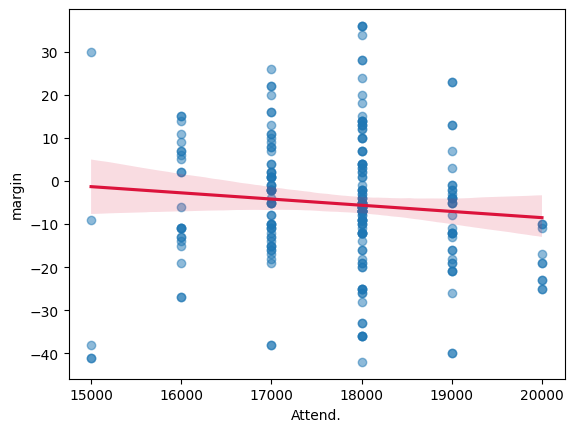

In [123]:
df['margin'] = df['Tm'] - df['Opp']#to check if attendance has any effect on performance
sns.regplot(
    data=df,                # the dataframe you're plotting from
    x='Attend.',            # column on the x-axis (attendance)
    y='margin',             # column on the y-axis (margin)
    scatter_kws={'alpha':0.5},   # settings for the scatterplot dots
    line_kws={'color':'crimson'} # settings for the regression line
)


In [124]:
corr = df['Attend.'].corr(df['margin'])#check the correlation coefficient
print("Correlation:", corr)

Correlation: -0.09766146353829896


In [125]:
df

,G,Date,Start (ET),Opponent,Tm,Opp,W,L,Attend.,Season,margin
0,1,2024-10-24,19:30:00,Dallas Mavericks,109,120,0,1,20000,2024,-11
1,2,2024-10-26,20:30:00,Houston Rockets,109,106,1,1,18000,2024,3
2,3,2024-10-28,20:00:00,Houston Rockets,101,106,1,2,17000,2024,-5
3,4,2024-10-30,21:30:00,Oklahoma City Thunder,93,105,1,3,17000,2024,-12
4,5,2024-10-31,21:00:00,Utah Jazz,106,88,2,3,18000,2024,18
...,...,...,...,...,...,...,...,...,...,...,...
241,78,2024-04-07,19:00:00,Philadelphia 76ers,126,133,19,59,18000,2023,-7
242,79,2024-04-09,20:00:00,Memphis Grizzlies,102,87,20,59,16000,2023,15
243,80,2024-04-10,20:00:00,Oklahoma City Thunder,89,127,20,60,17000,2023,-38
244,81,2024-04-12,20:00:00,Denver Nuggets,121,120,21,60,18000,2023,1


In [126]:


# 1. Correlation between attendance and margin
corr = df['Attend.'].corr(df['margin'])
print("Correlation between attendance and margin:", corr)

# 2. Biggest wins & losses
biggest_win = df.loc[df['margin'].idxmax()]
biggest_loss = df.loc[df['margin'].idxmin()]
print("\nBiggest win:\n", biggest_win)
print("\nBiggest loss:\n", biggest_loss)

# 3. Average margin by opponent
opponent_stats = df.groupby('Opponent')['margin'].mean().sort_values()
print("\nAverage margin by opponent:\n", opponent_stats)

# 4. Win/loss record by opponent
record_by_opponent = df.groupby('Opponent')[['W','L']].sum()
print("\nRecord by opponent:\n", record_by_opponent)

# 5. Attendance bands vs margin
attendance_band = df.groupby('Attend.')['margin'].mean()
print("\nAverage margin by attendance band:\n", attendance_band)


Correlation between attendance and margin: -0.09766146353829896

Biggest win:
 0
G                               33
Date           2024-12-31 00:00:00
Start (ET)                19:00:00
Opponent      Los Angeles Clippers
Tm                             122
Opp                             86
W                               17
L                               16
Attend.                      18000
Season                        2024
margin                          36
Name: 32, dtype: object

Biggest loss:
 0
G                                74
Date            2025-03-30 00:00:00
Start (ET)                 19:00:00
Opponent      Golden State Warriors
Tm                              106
Opp                             148
W                                31
L                                43
Attend.                       18000
Season                         2024
margin                          -42
Name: 73, dtype: object

Average margin by opponent:
 Opponent
Boston Celtics           -21.1666

In [127]:
#biggest win against Clippers by 36 points december 2024 worst loss by 42 points against warriors on march 30 2025
'''Struggles vs Elite Teams

Brutal averages against top opponents:

Celtics: -21.2 margin

Thunder: -17.5

Clippers: -13.4

Basically, the team consistently sinks against playoff contenders.

Bright Spots

Only a handful of opponents where they dominate:

Raptors (+12.2 avg margin)

Pistons (+9.8)

Hornets (+8.7)

→ So the team looks strong against rebuilding/lottery teams, but not against contenders.

Historic Record Woes

Looking at all-time head-to-heads, this team has losing records vs almost everyone.

For example:

vs Nuggets (180W–447L)

vs Warriors (171W–440L)

vs Thunder (119W–349L)

→ Shows a long-term trend of struggle against Western Conference powers.'''

'Struggles vs Elite Teams\n\nBrutal averages against top opponents:\n\nCeltics: -21.2 margin\n\nThunder: -17.5\n\nClippers: -13.4\n\nBasically, the team consistently sinks against playoff contenders.\n\nBright Spots\n\nOnly a handful of opponents where they dominate:\n\nRaptors (+12.2 avg margin)\n\nPistons (+9.8)\n\nHornets (+8.7)\n\n→ So the team looks strong against rebuilding/lottery teams, but not against contenders.\n\nHistoric Record Woes\n\nLooking at all-time head-to-heads, this team has losing records vs almost everyone.\n\nFor example:\n\nvs Nuggets (180W–447L)\n\nvs Warriors (171W–440L)\n\nvs Thunder (119W–349L)\n\n→ Shows a long-term trend of struggle against Western Conference powers.'

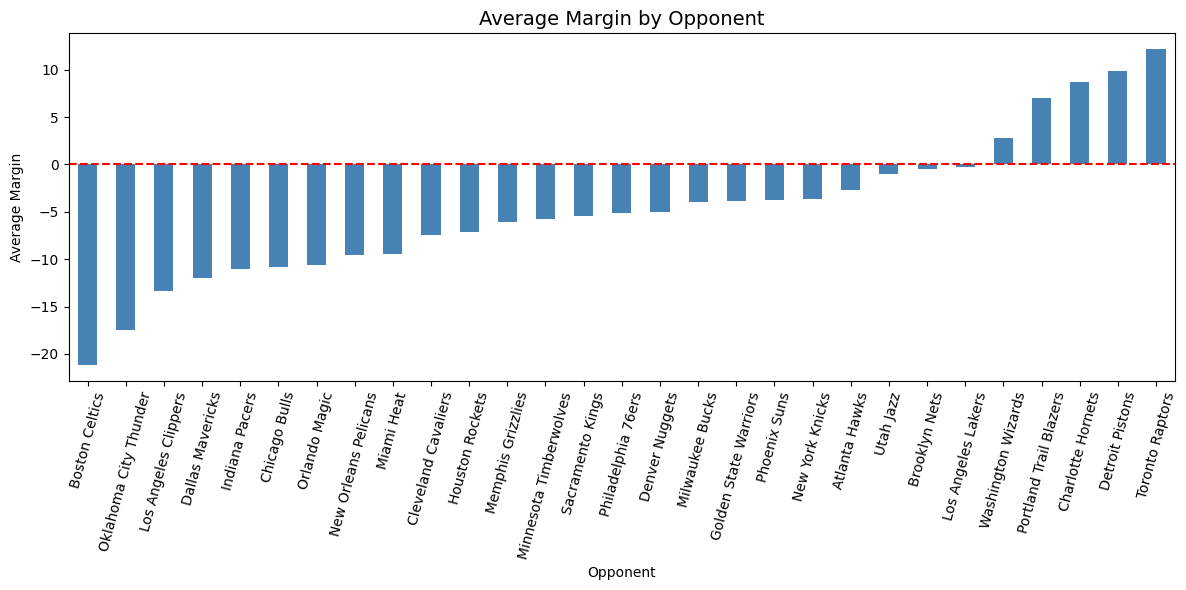

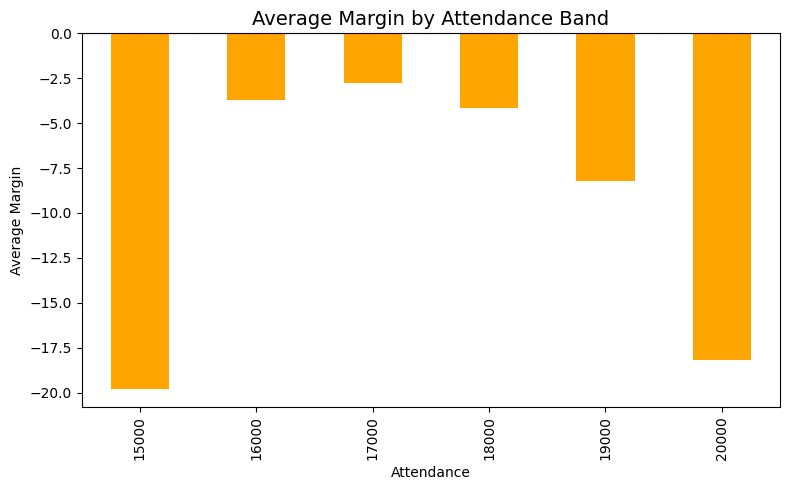

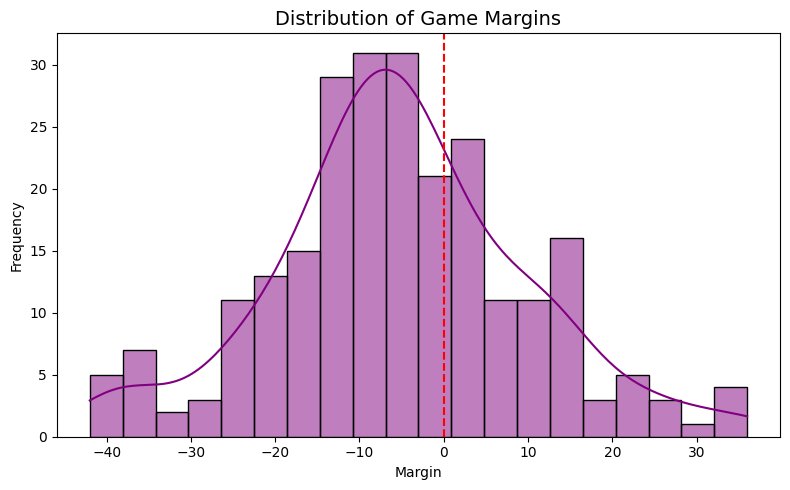

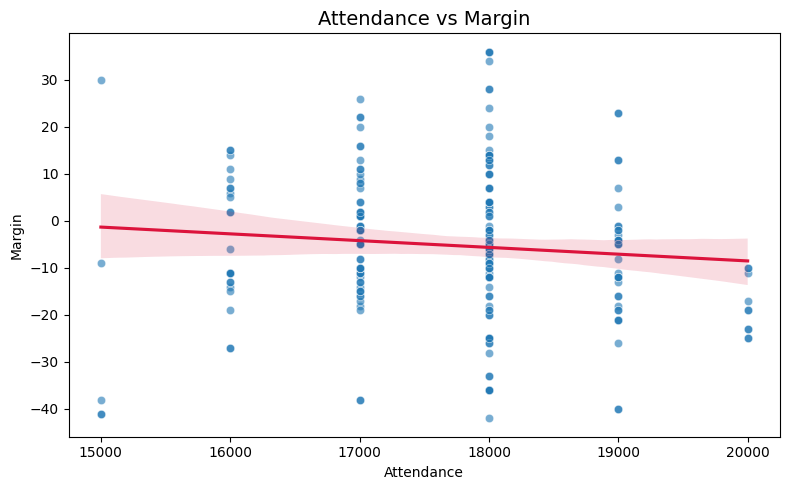

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average margin by opponent (bar chart)
plt.figure(figsize=(12,6))
opponent_stats.sort_values().plot(kind='bar', color='steelblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Average Margin by Opponent", fontsize=14)
plt.ylabel("Average Margin")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# 2. Attendance bands vs average margin
plt.figure(figsize=(8,5))
attendance_band.plot(kind='bar', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title("Average Margin by Attendance Band", fontsize=14)
plt.ylabel("Average Margin")
plt.xlabel("Attendance")
plt.tight_layout()
plt.show()

# 3. Distribution of margins (histogram)
plt.figure(figsize=(8,5))
sns.histplot(df['margin'], bins=20, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Game Margins", fontsize=14)
plt.xlabel("Margin")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Scatter: Attendance vs Margin
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Attend.', y='margin', alpha=0.6)
sns.regplot(data=df, x='Attend.', y='margin', scatter=False, color='crimson')
plt.title("Attendance vs Margin", fontsize=14)
plt.ylabel("Margin")
plt.xlabel("Attendance")
plt.tight_layout()
plt.show()


In [133]:
close_games = df[df['margin'].between(-5,5)]
blowouts = df[abs(df['margin']) > 15]

print("Close games record:", close_games['W'].sum(), "-", close_games['L'].sum())
print("Blowout games record:", blowouts['W'].sum(), "-", blowouts['L'].sum())
print("win% in close games:",100*close_games['W'].sum()/(close_games['W'].sum()+close_games['L'].sum()))
print("win% in blowout game:", blowouts['W'].sum()/(blowouts['W'].sum()+blowouts['L'].sum()))

Close games record: 875 - 2235
Blowout games record: 830 - 2009
win% in close games: 28.135048231511256
win% in blowout game: 0.29235646354350125


In [134]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df['PrevDate'] = df['Date'].shift(1)
df['DaysRest'] = (df['Date'] - df['PrevDate']).dt.days

rest_perf = df.groupby('DaysRest')['margin'].mean()
print(rest_perf)


DaysRest
0.0      -6.487805
1.0     -10.172414
2.0      -4.392523
3.0      -0.800000
4.0       2.166667
5.0       6.000000
8.0       3.000000
193.0   -11.000000
Name: margin, dtype: float64


In [135]:
df['Month'] = df['Date'].dt.month
monthly_perf = df.groupby('Month')['margin'].mean()
print(monthly_perf)


Month
1    -2.522727
2    -6.750000
3    -2.957447
4    -1.727273
10   -7.000000
11   -8.238095
12   -7.666667
Name: margin, dtype: float64


In [136]:
win_attend = df[df['W'] == 1]['Attend.'].mean()
loss_attend = df[df['L'] == 1]['Attend.'].mean()
print("Avg attendance in wins:", win_attend)
print("Avg attendance in losses:", loss_attend)


Avg attendance in wins: 18000.0
Avg attendance in losses: 18333.333333333332


In [137]:
margin_std = df['margin'].std()
print("Margin volatility (std):", margin_std)


Margin volatility (std): 15.082273126687303


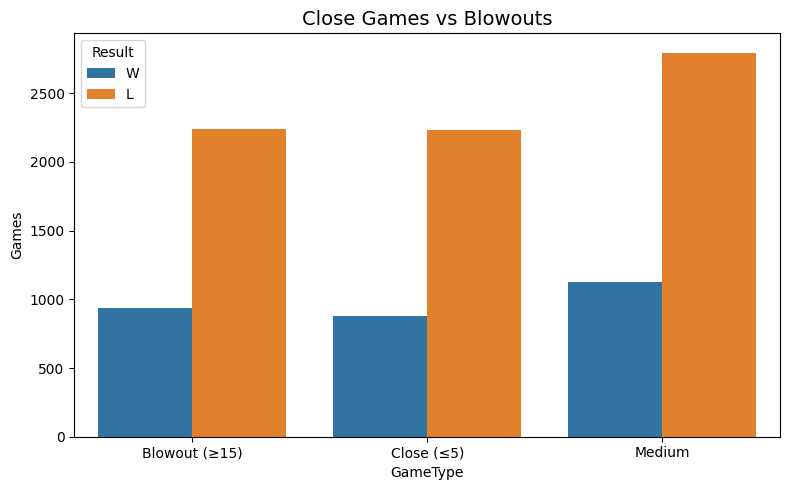

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

df['GameType'] = df['margin'].apply(lambda x: 
    'Close (≤5)' if abs(x) <= 5 else 'Blowout (≥15)' if abs(x) >= 15 else 'Medium')

game_type_record = df.groupby(['GameType'])[['W','L']].sum().reset_index()
game_type_record_melted = game_type_record.melt(id_vars='GameType', var_name='Result', value_name='Count')

plt.figure(figsize=(8,5))
sns.barplot(data=game_type_record_melted, x='GameType', y='Count', hue='Result')
plt.title("Close Games vs Blowouts", fontsize=14)
plt.ylabel("Games")
plt.tight_layout()
plt.show()



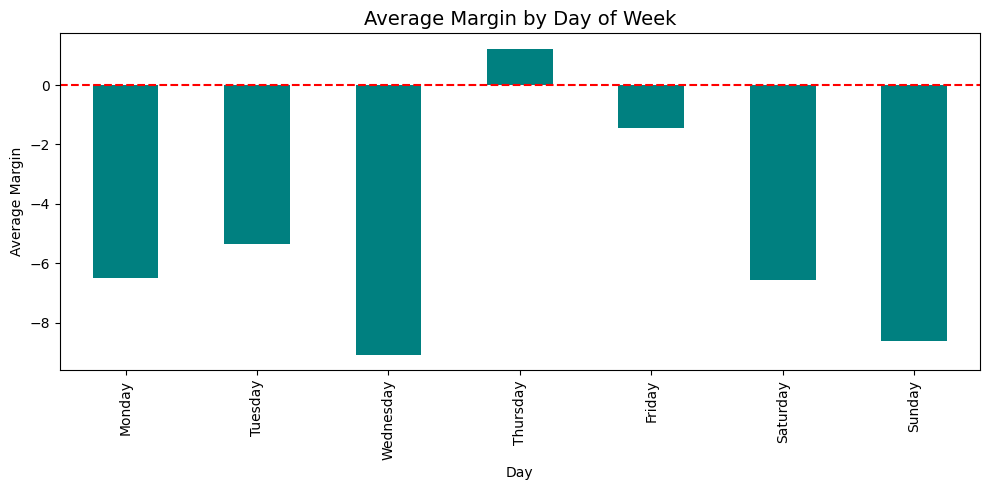

In [139]:
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
day_perf = df.groupby('Day')['margin'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(10,5))
day_perf.plot(kind='bar', color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.title("Average Margin by Day of Week", fontsize=14)
plt.ylabel("Average Margin")
plt.tight_layout()
plt.show()



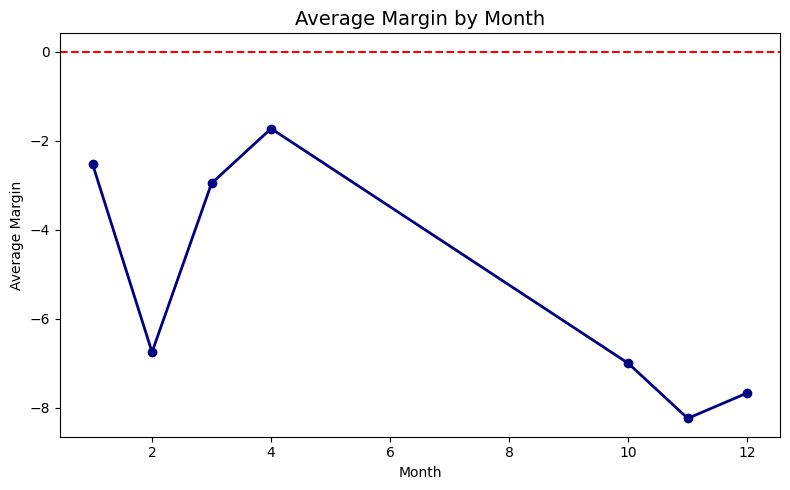

In [140]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_perf = df.groupby('Month')['margin'].mean()

plt.figure(figsize=(8,5))
monthly_perf.plot(kind='line', marker='o', linewidth=2, color='navy')
plt.axhline(0, color='red', linestyle='--')
plt.title("Average Margin by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Margin")
plt.tight_layout()
plt.show()


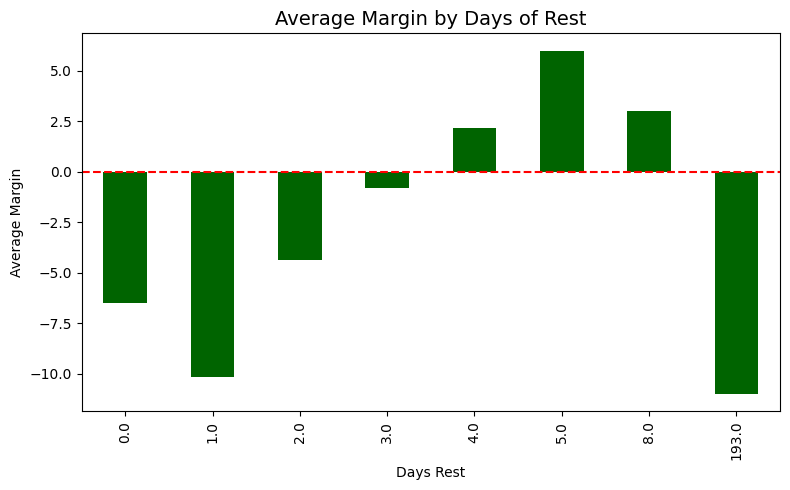

In [141]:
df = df.sort_values('Date')
df['PrevDate'] = df['Date'].shift(1)
df['DaysRest'] = (df['Date'] - df['PrevDate']).dt.days

rest_perf = df.groupby('DaysRest')['margin'].mean()

plt.figure(figsize=(8,5))
rest_perf.plot(kind='bar', color='darkgreen')
plt.axhline(0, color='red', linestyle='--')
plt.title("Average Margin by Days of Rest", fontsize=14)
plt.ylabel("Average Margin")
plt.xlabel("Days Rest")
plt.tight_layout()
plt.show()


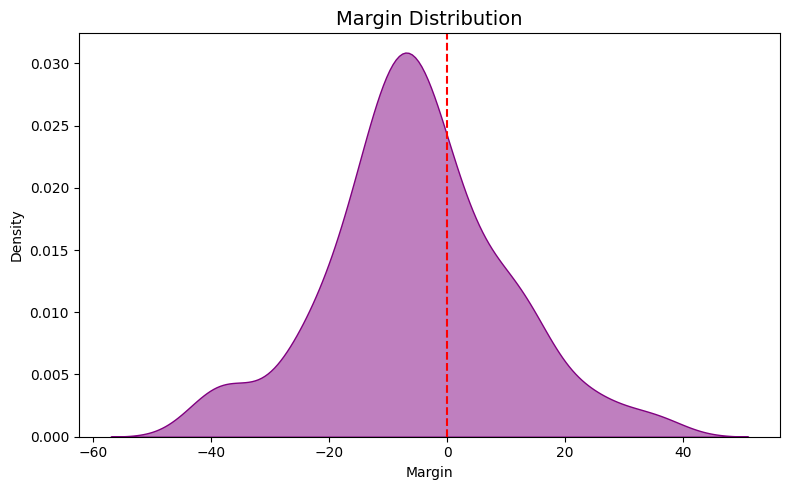

In [142]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['margin'], fill=True, color='purple', alpha=0.5)
plt.axvline(0, color='red', linestyle='--')
plt.title("Margin Distribution", fontsize=14)
plt.xlabel("Margin")
plt.tight_layout()
plt.show()
